In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_BankData=pd.read_csv('Bank.csv')
df_BankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df_BankData.shape

(5000, 14)

In [5]:
df_BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
df_BankData.nunique()
df_BankData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [63]:
df_BankData.Age.unique()
df_BankData.Experience.unique()
df_BankData.Income.unique()
df_BankData['ZIP Code'].unique()
df_BankData['Family'].unique()
df_BankData['CCAvg'].unique()
df_BankData['Education'].unique()
df_BankData['Mortgage'].unique()
df_BankData['Personal Loan'].unique()





   Mortgage    ID
0         0  3462


In [40]:
df_Count=df_BankData.groupby('Mortgage')['ID'].count().reset_index()
print(df_Count[df_Count['Mortgage']==0])




   Mortgage    ID
0         0  3462


In [65]:
df_Count=df_BankData.groupby('CCAvg')['ID'].count().reset_index()
print(df_Count[df_Count['CCAvg']==0])


   CCAvg   ID
0    0.0  106


In [64]:
for i in list(df_BankData.columns): # checking value counts of all object type columns
        if df_BankData[i].nunique() == 2:
            print(df_BankData[i].value_counts())
        
    #print()

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


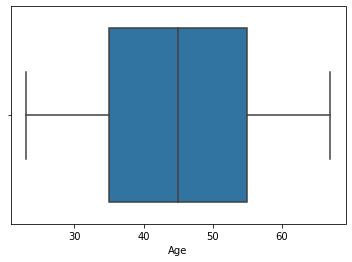

In [68]:
#Age                   5000 non-null int64
#Experience            5000 non-null int64
#Income                5000 non-null int64
#ZIP Code              5000 non-null int64
#Family                5000 non-null int64
#CCAvg                 5000 non-null float64
#Education             5000 non-null int64
#Mortgage              5000 non-null int64


sns.boxplot(df_BankData['Age'])
sns.boxplot(df_BankData['Experience'])
#sns.dist(df_BankData['ZIP Code'])
sns.boxplot(df_BankData['Family'])
sns.distplot(df_BankData['CCAvg'])
sns.boxplot(df_BankData['Education'])
sns.distplot(df_BankData['Mortgage'])

sns.pairplot(df_BankData)


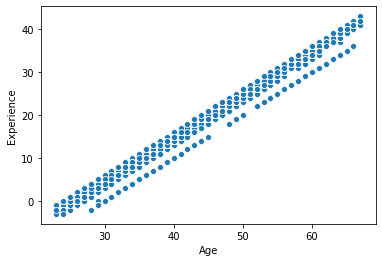

In [77]:
#sns.boxplot(df_BankData['Experience'])
sns.scatterplot(x=df_BankData['Age'],y=df_BankData['Experience'])

In [20]:
absValue =lambda x:x.fillna(x.abs())
df_BankData = df_BankData.apply(absValue,axis=0)

 

In [7]:
df_BankDataFinal=df_BankData.copy()

df_BankDataFinal.drop(df_BankDataFinal.columns[[0,4]],axis=1,inplace=True)

df_BankDataFinal.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
X = df_BankDataFinal.drop('Personal Loan', axis=1)
Y = df_BankDataFinal[['Personal Loan']]

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)



In [9]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)


In [55]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42,penalty='l1')# changing penalty to l1

model.fit(X_train, y_train)

#print(X_test)
#X_test2=X_test.iloc[:1]

#print(X_test2)

y_predict = model.predict(X_test)     

print(y_predict)

[0 0 0 ... 0 0 0]


In [13]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9511428571428572

Testing accuracy 0.9446666666666667

Confusion Matrix


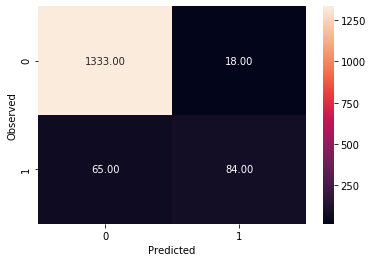

None

Recall: 0.5637583892617449

Precision: 0.8235294117647058

F1 Score: 0.6693227091633467

Roc Auc Score: 0.7752174625805395


In [15]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [69]:
"""
In the below scenario we tried changing the parameters by changing the solver. We observed that in case of saga the ROC curve 
lower than the one for liblinear. We also changed the Penalty to check if there was an effect on ROC Curve which was not that 
apparent. When we were using penalty=L2 and penalty=none we observed slight difference in the ROC curve in case where penalty parameter
was none we saw almost 0.1 increase in the ROC Curve which means better model. Also, the recall has increased significantly
by almost 5 percent when using l2 penalty. Also, below demostrates the variation of threshhold and its effects on the 
precision,recall and roc_area under curve

"""



from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42,penalty='none',solver='newton-cg') 

model.fit(X_train, y_train)

#y_predict = model.predict(X_test)   


#print(X_test)
#X_test2=X_test.iloc[:50]

#print(X_test2)
threshhold=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#y_predict = model.predict(X_test2)     
for i in list (threshhold):
    y_predict = (model.predict_proba(X_test)[:,1] >= i).astype(bool) # set threshold as 0.3
    print("Recall for threshhold:",i,"=",recall_score(y_test,y_predict))
    print("Precision for threshhold:",i,"=",precision_score(y_test,y_predict))
    print("Roc Auc Score for threshhold:",i,"=",roc_auc_score(y_test,y_predict))
        
print()


Recall for threshhold: 0.1 = 0.8590604026845637
Precision for threshhold: 0.1 = 0.5099601593625498
Roc Auc Score for threshhold: 0.1 = 0.8840083656650058
Recall for threshhold: 0.2 = 0.7919463087248322
Precision for threshhold: 0.2 = 0.6051282051282051
Roc Auc Score for threshhold: 0.2 = 0.8674757450359912
Recall for threshhold: 0.3 = 0.6912751677852349
Precision for threshhold: 0.3 = 0.7054794520547946
Roc Auc Score for threshhold: 0.3 = 0.8297234462168217
Recall for threshhold: 0.4 = 0.6174496644295302
Precision for threshhold: 0.4 = 0.7863247863247863
Roc Auc Score for threshhold: 0.4 = 0.7994724265893025
Recall for threshhold: 0.5 = 0.5906040268456376
Precision for threshhold: 0.5 = 0.8301886792452831
Roc Auc Score for threshhold: 0.5 = 0.7886402813724857
Recall for threshhold: 0.6 = 0.5369127516778524
Precision for threshhold: 0.6 = 0.898876404494382
Roc Auc Score for threshhold: 0.6 = 0.7651255098137597
Recall for threshhold: 0.7 = 0.46308724832214765
Precision for threshhold: 0.

Trainig accuracy 0.9531428571428572

Testing accuracy 0.9473333333333334

Confusion Matrix


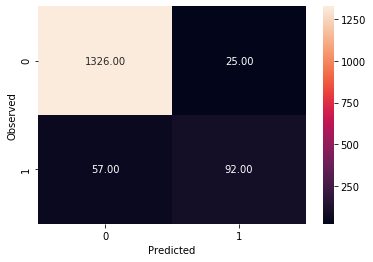

None

Recall: 0.6174496644295302

Precision: 0.7863247863247863

F1 Score: 0.6917293233082707

Roc Auc Score: 0.7994724265893025


In [66]:



print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [41]:
# Below is an example of finding right value for C which gives greatest accuracy.

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.876, 0.894, 0.901, 0.902, 0.902, 0.902]

[0.868, 0.889, 0.893, 0.89, 0.891, 0.891]


(0, 1)

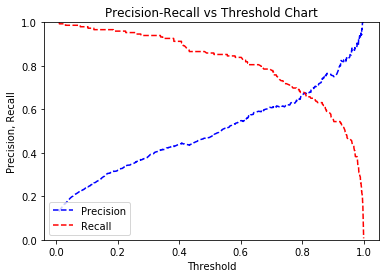

In [49]:
### Predict test_y values and probabilities based on fitted logistic regression model

pred_y=model.predict(X_test) 

probs_y=model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
from sklearn import metrics

precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

"""
Below Graph tells us the optimal value for threshold where Recall and Precision for the model will be most effective. In this
case 0.8 Threshold gives the optimum Recall and Precision

""" 

In [ ]:
"""
As we have observed in the dataset there were variables which held no relevance to the prediction model ZIP Code and ID therefore 
we dropped the columns. The above model predicts the customers which should be targeted for the personal loan. Above model will 
perform optimum if the threshhold is set as 0.8
"""